In [4]:
# import all needed packages

import numpy as np
import seaborn as sn
from keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import collections
from collections import Counter
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import os
from PIL import Image
from pathlib import Path
import time
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

In [5]:
# define the paths to find the respective data

train_path = "traffic_sign_data//Train//"
test_path = "traffic_sign_data//Test//"
test_label_path = "traffic_sign_data//Test.csv"
meta_path = "traffic_sign_data//Meta"

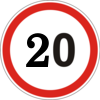

In [6]:
# show some examples

image_label_0 = "//0.png"
img_0 = Image.open("traffic_sign_data//Meta" + image_label_0)
img_0

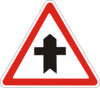

In [7]:
image_label_11 = "//11.png"
img_11 = Image.open("traffic_sign_data//Meta" + image_label_11)
img_11

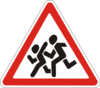

In [8]:
image_label_28 = "//28.png"
img_28 = Image.open("traffic_sign_data//Meta" + image_label_28)
img_28

In [9]:
# read in train images and respective labels

start = time.time()

dir_list = os.listdir(train_path)
train_images = []
train_label = []
    
for i in range(len(dir_list)):
    actual_label = dir_list[i]
    actual_path = train_path + str(dir_list[i])
    pathlist = Path(actual_path).glob('**/*.png')

    for path in pathlist:
        path_in_str = str(path)
        img = Image.open(path_in_str)
        img = img.resize((32,32))
        img = np.asanyarray(img)
        train_images.append(img)
        train_label.append(actual_label)

arr_train_images = np.asanyarray(train_images)
arr_train_label = np.asanyarray(train_label)
print(arr_train_images.shape)
print(arr_train_label.shape)

end = time.time()

print("Time taken: ", round(end-start, 0), "seconds")

(39209, 32, 32, 3)
(39209,)
Time taken:  45.0 seconds


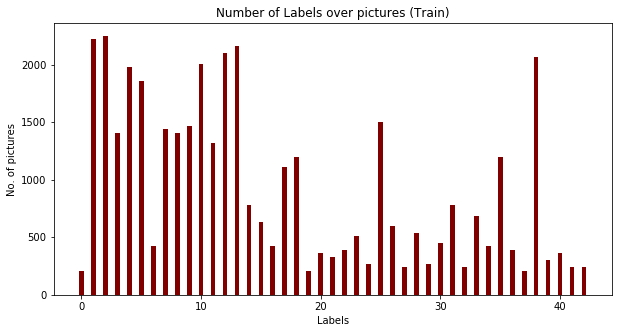

In [10]:
# create a dictionary and provide a visualization to get to know the database in detail

train_label_dict = Counter(train_label)

label = []
count = []
for i in range (len(train_label_dict.keys())):
    label.append(i)
    value = train_label_dict.get(str(i))
    count.append(value)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(label, count, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Labels")
plt.ylabel("No. of pictures")
plt.title("Number of Labels over pictures (Train)")
plt.show()    

In [11]:
print(train_label_dict)

Counter({'2': 2250, '1': 2220, '13': 2160, '12': 2100, '38': 2070, '10': 2010, '4': 1980, '5': 1860, '25': 1500, '9': 1470, '7': 1440, '3': 1410, '8': 1410, '11': 1320, '18': 1200, '35': 1200, '17': 1110, '14': 780, '31': 780, '33': 689, '15': 630, '26': 600, '28': 540, '23': 510, '30': 450, '16': 420, '34': 420, '6': 420, '22': 390, '36': 390, '20': 360, '40': 360, '21': 330, '39': 300, '24': 270, '29': 270, '27': 240, '32': 240, '41': 240, '42': 240, '0': 210, '19': 210, '37': 210})


In [12]:
# get test labels

df = pd.read_csv(test_label_path)

df = df["ClassId"]
test_label = df.values

arr_test_label = np.asanyarray(test_label)
print(arr_test_label.shape)

(12630,)


In [13]:
# get test images

start = time.time()

pathlist_test = Path(test_path).glob('**/*.png')

test_images = []

for path in pathlist_test:
    path_in_str = str(path)
    img = Image.open(path_in_str)
    img = img.resize((32,32))
    img = np.asanyarray(img)
    test_images.append(img)
    
arr_test_images = np.asanyarray(test_images)
print(arr_test_images.shape)

end = time.time()
print("Time taken: ", round(end-start, 0), "seconds")

(12630, 32, 32, 3)
Time taken:  18.0 seconds


In [14]:
# shuffle train and test data

X, y = shuffle(arr_train_images, arr_train_label, random_state=20)
X_test, y_test = shuffle(arr_test_images, arr_test_label, random_state=20)

In [15]:
# split train data into train and validation

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [16]:
# use class weights to face inbalanced data

class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train), y_train)

In [17]:
# use to_categorical to ensure the right shape for train and test

y_train = to_categorical(y_train, num_classes = len(dir_list))
y_val = to_categorical(y_val, num_classes = len(dir_list))
y_test = to_categorical(y_test, num_classes = len(dir_list))

In [18]:
# normalize data

X_train = X_train.astype(np.float32)/255.
X_val = X_val.astype(np.float32)/255.
X_test = X_test.astype(np.float32)/255.

In [16]:
# define a model architecture

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3), padding = "same"))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding = "same"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding = "same"))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dense(43, activation="softmax"))

#activation: softmax, sigmoid
#optimizer: adam, sgd

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)    

In [17]:
# use image augmentation to improve the model

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

In [18]:
# use checkpoint to save the model after each epoch

filepath="checkpoint_test//{epoch:02d}-{val_loss:.2f}.h5"
checkpoint = ModelCheckpoint(filepath=filepath,
    monitor='val_loss',
    verbose = 1,
    mode='max',
    save_best_only=False)
callbacks_list = [checkpoint]

In [19]:
# train and save record in history

history = model.fit(datagen.flow(X_train, y_train, batch_size = 130), class_weight=class_weights,
                    epochs = 20, validation_data=(X_val, y_val), callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
11763/11763 [==============================] - 10s 837us/sample - loss: 2.9790 - acc: 0.1513

Epoch 00001: saving model to checkpoint_test//01-2.98.h5
212/212 [==============================] - 88s 417ms/step - loss: 3.2930 - acc: 0.0970 - val_loss: 2.9799 - val_acc: 0.1513
Epoch 2/20
11763/11763 [==============================] - 10s 879us/sample - loss: 1.9163 - acc: 0.4240

Epoch 00002: saving model to checkpoint_test//02-1.92.h5
212/212 [==============================] - 89s 420ms/step - loss: 2.8056 - acc: 0.2034 - val_loss: 1.9170 - val_acc: 0.4240
Epoch 3/20
11763/11763 [==============================] - 10s 891us/sample - loss: 1.3192 - acc: 0.5395

Epoch 00003: saving model to checkpoint_test//03-1.32.h5
212/212 [==============================] - 91s 431ms/step - loss: 1.9470 - acc: 0.3802 - val_loss: 1.3200 - val_acc: 0.5395
Epoch 4/20
11763/11763 [==============================] - 10s 865us/sample - loss: 1.1637 - ac

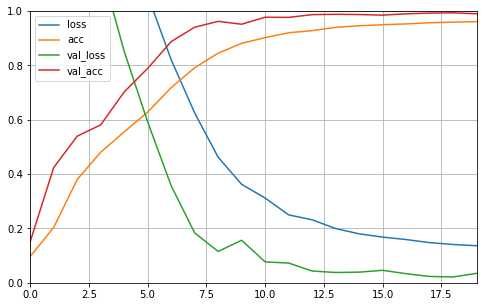

In [20]:
# get metrics during training process

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
# loade best model

best_model_path = ("19-0.02.h5")
model = keras.models.load_model(best_model_path)

In [20]:
# make predictions over test data

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis = 1)
y_test = np.argmax(y_test,axis = 1)

In [21]:
# print accuracy over test data

accuracy_score(y_test, y_pred)

0.9726049089469517

In [25]:
# create confusion matrix

conf = confusion_matrix(y_test, y_pred)
print(conf[0])

[60  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


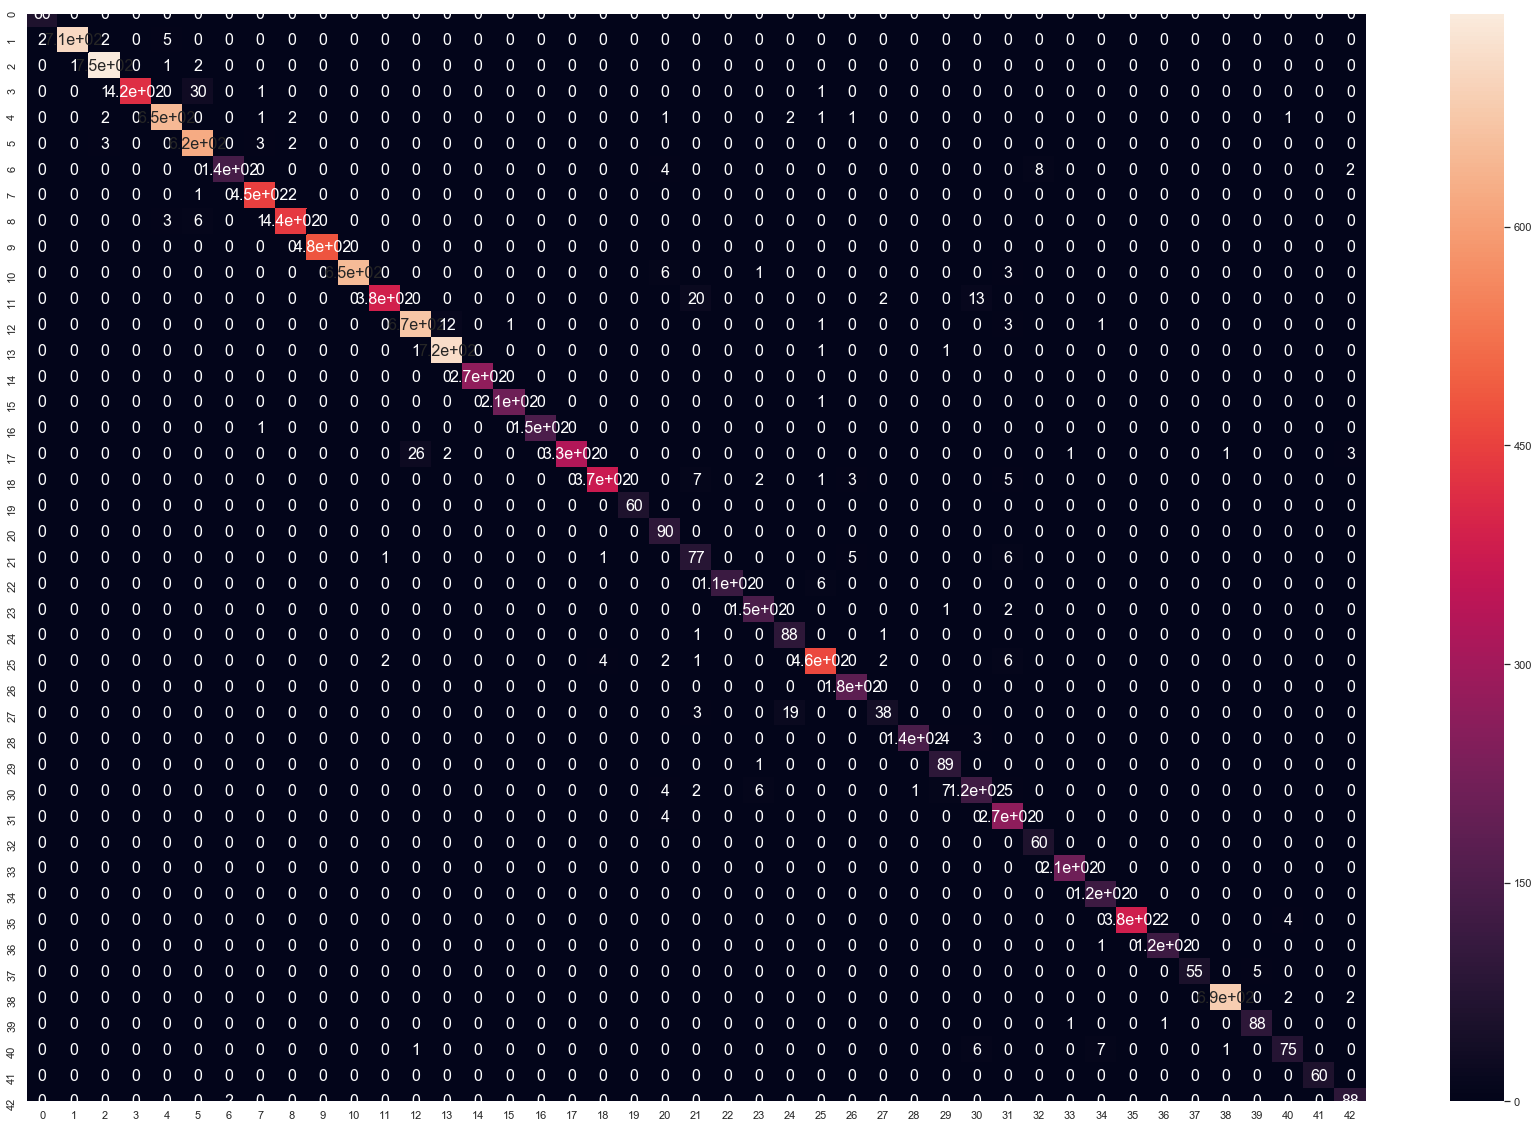

In [26]:
# plot confusion matrix

df_cm = pd.DataFrame(conf, range(43), range(43))
plt.figure(figsize=(30,20))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()